In [1]:
#Hypothesis and three questions

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [3]:
life_expectancy_clean = "resources/life_expectancy_clean.csv"

life_expectancy = pd.read_csv(life_expectancy_clean)

In [4]:
life_expectancy.head()

,Country,Year,Status,Life Expectancy,Adult Mortality (%),Infant Deaths (%),Alcohol Consumpter per Capita (ltr),Percentage Expenditure,Hepatitis B Vaccines (%),Measles Cases (%),...,Polio Vaccines (%),Total Expenditure (%),Diphtheria Vaccines (%),HIV/AIDS Deaths Under 5yo (%),GDP Per Capita ($),Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,26.3,6.2,0.01,71.28,65.0,115.4,...,6.0,8.16,65.0,0.01,584.26,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,27.1,6.4,0.01,73.52,62.0,49.2,...,58.0,8.18,62.0,0.01,612.70,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,26.8,6.6,0.01,73.22,64.0,43.0,...,62.0,8.13,64.0,0.01,631.74,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,27.2,6.9,0.01,78.18,67.0,278.7,...,67.0,8.52,67.0,0.01,669.96,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,27.5,7.1,0.01,7.10,68.0,301.3,...,68.0,7.87,68.0,0.01,63.54,2978599.0,18.2,18.2,0.454,9.5


In [5]:
mean = life_expectancy.groupby('Country')["Life Expectancy"].mean()
median = life_expectancy.groupby('Country')["Life Expectancy"].median()
var = life_expectancy.groupby('Country')["Life Expectancy"].var()
std = life_expectancy.groupby('Country')["Life Expectancy"].std()
summary_statistics = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var,"Standard Dev.": std})
summary_statistics.head()

,Mean,Median,Variance,Standard Dev.
Country,,,,
Afghanistan,58.193750,57.8,5.667292,2.380607
Albania,75.156250,75.6,3.373292,1.836652
Algeria,73.486667,73.8,2.284095,1.511322
Angola,48.793333,48.2,7.763524,2.786310
Antigua and Barbuda,74.966667,75.0,0.720952,0.849089


In [6]:
developing_countries = life_expectancy.loc[life_expectancy["Status"] == "Developing",:]
developing_countries.head()

,Country,Year,Status,Life Expectancy,Adult Mortality (%),Infant Deaths (%),Alcohol Consumpter per Capita (ltr),Percentage Expenditure,Hepatitis B Vaccines (%),Measles Cases (%),...,Polio Vaccines (%),Total Expenditure (%),Diphtheria Vaccines (%),HIV/AIDS Deaths Under 5yo (%),GDP Per Capita ($),Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,26.3,6.2,0.01,71.28,65.0,115.4,...,6.0,8.16,65.0,0.01,584.26,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,27.1,6.4,0.01,73.52,62.0,49.2,...,58.0,8.18,62.0,0.01,612.70,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,26.8,6.6,0.01,73.22,64.0,43.0,...,62.0,8.13,64.0,0.01,631.74,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,27.2,6.9,0.01,78.18,67.0,278.7,...,67.0,8.52,67.0,0.01,669.96,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,27.5,7.1,0.01,7.10,68.0,301.3,...,68.0,7.87,68.0,0.01,63.54,2978599.0,18.2,18.2,0.454,9.5


In [19]:
#Do early life vaccinations affect average life expectancy in developing countries?
#In particular a regression will be done on polio and diphtheria vaccines to measure the strength of the correlation

In [7]:
mean_life_expectancy_dip_developing = developing_countries.groupby(['Country'], as_index = False).agg({"Life Expectancy" : np.mean,
                                                                                                 "Diphtheria Vaccines (%)" : np.mean})                                                             
mean_life_expectancy_dip_developing.head()

,Country,Life Expectancy,Diphtheria Vaccines (%)
0,Afghanistan,58.193750,52.312500
1,Albania,75.156250,98.062500
2,Algeria,73.486667,91.666667
3,Angola,48.793333,46.600000
4,Antigua and Barbuda,74.966667,98.266667


<IPython.core.display.Javascript object>


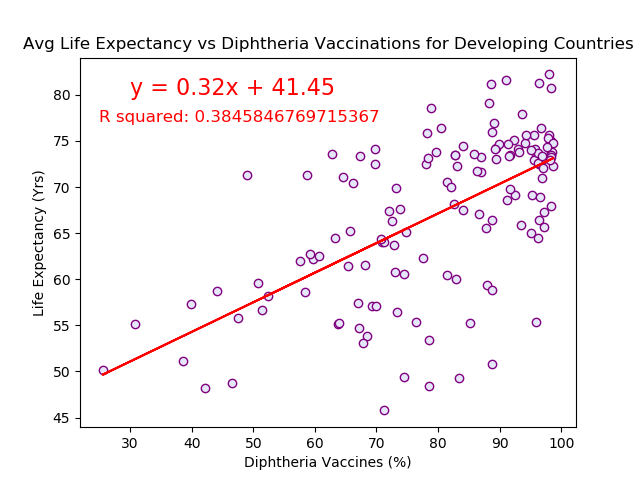

R squared: 0.3845846769715367


In [35]:
x_values = mean_life_expectancy_dip_developing["Diphtheria Vaccines (%)"]
y_values = mean_life_expectancy_dip_developing["Life Expectancy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker = "o", edgecolors = "purple", facecolors="lavender")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,80),fontsize=16,color="red")
plt.ylabel('Life Expectancy (Yrs)')
plt.xlabel('Diphtheria Vaccines (%)')
plt.title('Avg Life Expectancy vs Diphtheria Vaccinations for Developing Countries')
print(f"R squared: {rvalue**2}")
plt.annotate(f"R squared: {rvalue**2}",(25,77),fontsize=12,color="red")
plt.show()
#plt.savefig("output_data/Avg Life Expectancy vs Diphtheria Vaccinations for Developing Countries.png")

In [20]:
mean_life_expectancy_polio_developing = developing_countries.groupby(['Country'], as_index = False).agg({"Life Expectancy" : np.mean,
                                                                                                 "Polio Vaccines (%)" : np.mean})                                                             
mean_life_expectancy_polio_developing.head()

,Country,Life Expectancy,Polio Vaccines (%)
0,Afghanistan,58.193750,48.375000
1,Albania,75.156250,98.125000
2,Algeria,73.486667,91.533333
3,Angola,48.793333,48.733333
4,Antigua and Barbuda,74.966667,97.666667


<IPython.core.display.Javascript object>


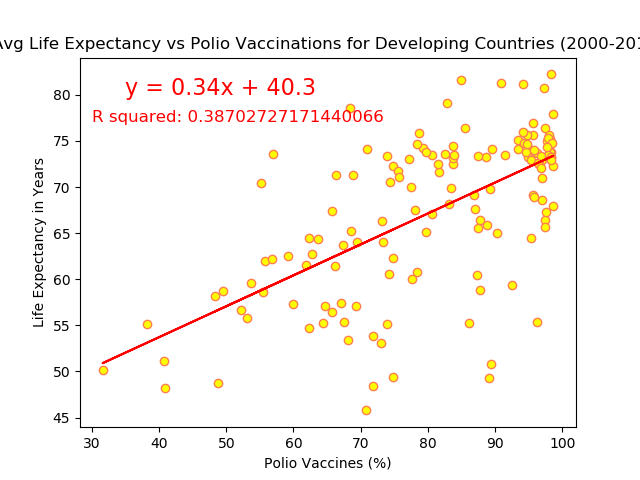

In [36]:
x_values = mean_life_expectancy_polio_developing["Polio Vaccines (%)"]
y_values = mean_life_expectancy_polio_developing["Life Expectancy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = "o", edgecolors = "coral", facecolors="yellow")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,80),fontsize=16,color="red")
plt.ylabel('Life Expectancy in Years')
plt.xlabel('Polio Vaccines (%)')
plt.title('Avg Life Expectancy vs Polio Vaccinations for Developing Countries (2000-2015)')
# print(f"R squared: {rvalue**2}")
plt.annotate(f"R squared: {rvalue**2}",(30,77),fontsize=12,color="red")
plt.show()
#plt.savefig("output_data/Avg Life Expectancy vs Polio Vaccinations for Developing Countries (2000-2015).png")

In [ ]:
#Is increased schooling positively correlated with increased life expectancy?

<IPython.core.display.Javascript object>


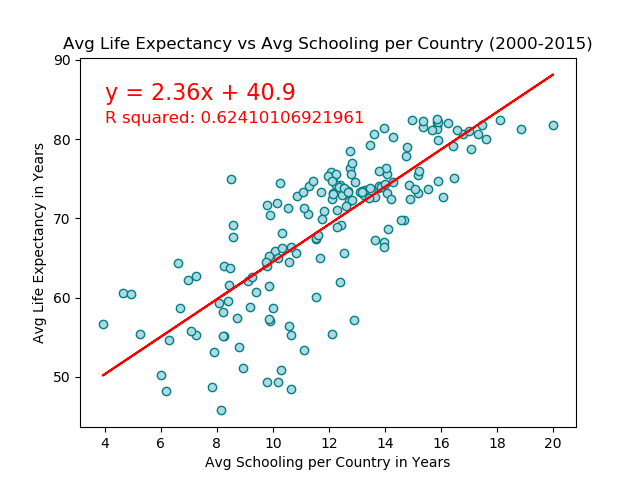

Text(4, 82, 'R squared: 0.62410106921961')

In [37]:
#use this for testing schooling variable
mean_lifeexp = life_expectancy.groupby('Country')["Life Expectancy"].mean()
mean_school = life_expectancy.groupby('Country')["Schooling"].mean()

#Data frame for schooling and life expectancy 
schooling_avgs = pd.DataFrame({"Avg Life Expectancy (2000-2015)": mean_lifeexp,
                               "Avg Schooling per Country (2000-2015)": mean_school})

#QUESTION 
#Is increased schooling positively correlated with increased life expectancy?
y_axis = schooling_avgs["Avg Life Expectancy (2000-2015)"]
x_axis = schooling_avgs["Avg Schooling per Country (2000-2015)"]


#regression code
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot
plt.scatter(x_axis, y_axis, marker = "o", edgecolors = "teal", facecolors="lightblue")
plt.title("Avg Life Expectancy vs Avg Schooling per Country (2000-2015)")
plt.ylabel("Avg Life Expectancy in Years")
plt.xlabel("Avg Schooling per Country in Years")


#regression code 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(4,85),fontsize=16,color="red")
plt.show()
# print("The r-value is " + str(rvalue**2))
plt.annotate(f"R squared: {rvalue**2}",(4,82),fontsize=12,color="red")
#plt.savefig("output_data/Avg Life Expectancy vs Avg Schooling per Country (2000-2015).png")
